<a href="https://colab.research.google.com/github/beyzassevval/beyzassevval/blob/main/Yapay_sinir_a%C4%9F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
#kaggle a bağlanır verisetini indirmek gerekmez
path=kagglehub.dataset_download('aadeshkoirala/mnist-784')
print("Path to dataset files: ",path)

100%|██████████| 15.2M/15.2M [00:00<00:00, 175MB/s]

Extracting files...


Path to dataset files:  /root/.cache/kagglehub/datasets/aadeshkoirala/mnist-784/versions/1


In [ ]:
import pandas as pd
import os

dosyayolu=os.path.join(path,'mnist_784.csv')
df=pd.read_csv(dosyayolu)
print(df.head())
print(df.shape)
#toplam 785 kolon var
#class bu pixellerinin sonucunun ne olduğunu söyler
#veriler zaten 0 ve 1 lerden oluşuyor

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  pixel781  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0         0         0         0   
3        0  ...         0         0         0         0         0         0   
4        0  ...         0         0         0         0         0         0   

   pixel782  pixel783  pixel784  class  
0         0         0

In [ ]:
df.info()
#kontrol edelim

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to class
dtypes: int64(785)
memory usage: 419.2 MB


In [ ]:
y_sample=df.iloc[:,784]
x_sample=df.iloc[:,0:784]
print(y_sample.shape)
print(x_sample.shape)
#x ve y satır-sütün ayrıldı

(70000,)
(70000, 784)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sample,y_sample,test_size=0.2,random_state=42)
x_val,x_test,y_val,y_test=train_test_split(x_test,y_test,test_size=0.5,random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)
#train - test - validation olarak veriyi ayırdık
#yapay sinir ağlarında validation mutlaka kullanılmalı
#yapay sinir ağlarında min-max scalaer ,standart-scalerdan daha iyi çalışır

(56000, 784)
(56000,)
(7000, 784)
(7000,)
(7000, 784)
(7000,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
#sadece train i yaparsan sonuçlar tutarlı olmaz hepsi yapılmalı
x_train=scaler.fit_transform(x_train)
x_val=scaler.fit_transform(x_val)
x_test=scaler.fit_transform(x_test)

In [ ]:
print(y_train)
#label encoding li olarak gelmiş zaten yapmamız gerekmez

47339    5
67456    4
12308    8
32557    0
664      2
        ..
37194    6
6265     6
54886    1
860      0
15795    0
Name: class, Length: 56000, dtype: int64


In [ ]:
import tensorflow as tf
from tensorflow import keras
#yapay sinir ağlarında kullanacağımız önemli kütüphaneler-- pychorc da var
from tensorflow.keras import layers
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import random
import os
#burayı gbt yazdı farklı denemelerden sonra aynı kodda yine yakın sonuç almam için
seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)


model=keras.Sequential({   #sıralı birbirini takip eden anlamında
    layers.Dense(128,activation="relu",input_shape=(784,)),
    layers.Dense(64,activation="relu"), #katmanları karmaşıklaştırdıkça overfitting e yaklaşılır dikkat!!!
    layers.Dense(10,activation="softmax") #çıkışta aktivasyon fonk yapıcaksan 2 den fazla ise softmax
})                                       # şuan model mimari olarak tasarlandı 3 katmanlı
#layers.Dropout(0.2) overfitting i önlemek için bazı olları sil demek layerlar arası yazılır
#layers.BatchNormalization verileri daha normal hale getirir
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"]) #optimizer rmsprop,adam,sgd... dene

history=model.fit(x_train,y_train,epochs=10,validation_data=(x_val,y_val))
#history

Epoch 1/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8623 - loss: 0.4690 - val_accuracy: 0.9463 - val_loss: 0.1803
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9598 - loss: 0.1304 - val_accuracy: 0.9560 - val_loss: 0.1497
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9714 - loss: 0.0903 - val_accuracy: 0.9640 - val_loss: 0.1246
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9791 - loss: 0.0672 - val_accuracy: 0.9646 - val_loss: 0.1270
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9832 - loss: 0.0527 - val_accuracy: 0.9646 - val_loss: 0.1302
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9869 - loss: 0.0416 - val_accuracy: 0.9640 - val_loss: 0.1328
Epoch 7/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9884 - loss: 0.0366 - val_accuracy: 0.9664 - val_loss: 0.1364
Epoch 8/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9902 - loss: 0.0301

In [ ]:
from sklearn.neural_network import MLPClassifier

#batch size paketi parça parça gpu ya yükler
model=MLPClassifier(hidden_layer_sizes=(256,128),activation="relu",verbose=True,solver="adam",alpha=0.0001,learning_rate="invscaling",max_iter=500,random_state=42)
history=model.fit(x_train,y_train)
#early_stopping eklenebilir epochs u azaltmak için
#transformerın son aşaması MLP ile yapılıyor
#Bu asıl kodda yoktu sonradan bu modeli denemek için ekledik

Iteration 1, loss = 0.31096816
Iteration 2, loss = 0.11775421
Iteration 3, loss = 0.07733190
Iteration 4, loss = 0.05640635
Iteration 5, loss = 0.04169073
Iteration 6, loss = 0.03127568
Iteration 7, loss = 0.02532903
Iteration 8, loss = 0.02043675
Iteration 9, loss = 0.01365725
Iteration 10, loss = 0.01085603
Iteration 11, loss = 0.01262426
Iteration 12, loss = 0.01084594
Iteration 13, loss = 0.01227625
Iteration 14, loss = 0.00827628
Iteration 15, loss = 0.00758541
Iteration 16, loss = 0.00766560
Iteration 17, loss = 0.00682427
Iteration 18, loss = 0.00820242
Iteration 19, loss = 0.00464031
Iteration 20, loss = 0.00740759
Iteration 21, loss = 0.00714143
Iteration 22, loss = 0.00637061
Iteration 23, loss = 0.00732418
Iteration 24, loss = 0.00332697
Iteration 25, loss = 0.00210879
Iteration 26, loss = 0.00543559
Iteration 27, loss = 0.00633096
Iteration 28, loss = 0.00648954
Iteration 29, loss = 0.00249613
Iteration 30, loss = 0.00211916
Iteration 31, loss = 0.00171495
Iteration 32, los

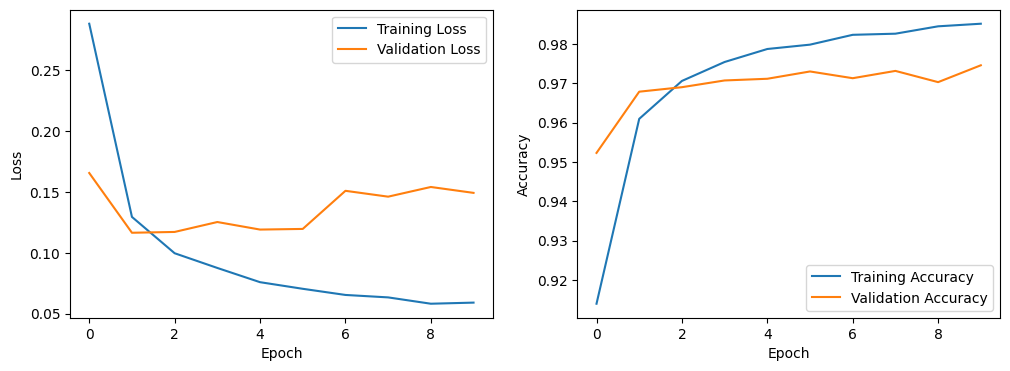

In [ ]:
# Kayıp ve doğruluk grafiği
#ilk olarak bu grafiklere bakmalıyız loss ve accuracy **istenir
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9765 - loss: 0.1276
Test accuracy: 0.975428581237793
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix:
 [[676   0   1   0   1   0   3   0   3   1]
 [  0 811   1   2   0   0   0   3   3   0]
 [  1   2 691   0   6   0   4   3   8   1]
 [  0   0   7 687   1   6   0   7   6   1]
 [  1   0   0   0 647   0   1   2   1   7]
 [  0   1   0   6   1 614   7   0   4   1]
 [  1   0   0   0   4   2 680   0   2   0]
 [  0   2   2   0   0   1   0 704   0   1]
 [  3   2   4   4   3   3   1   5 613   5]
 [  1   1   1   3   7   0   1   7   3 705]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       685
           1       0.99      0.99      0.99       820
           2       0.98      0.97      0.97       716
           3       0.98      0.96      0.97       715
           4       0.97      0.98      0.97       659
           5       0.98      0.97      0.97       6

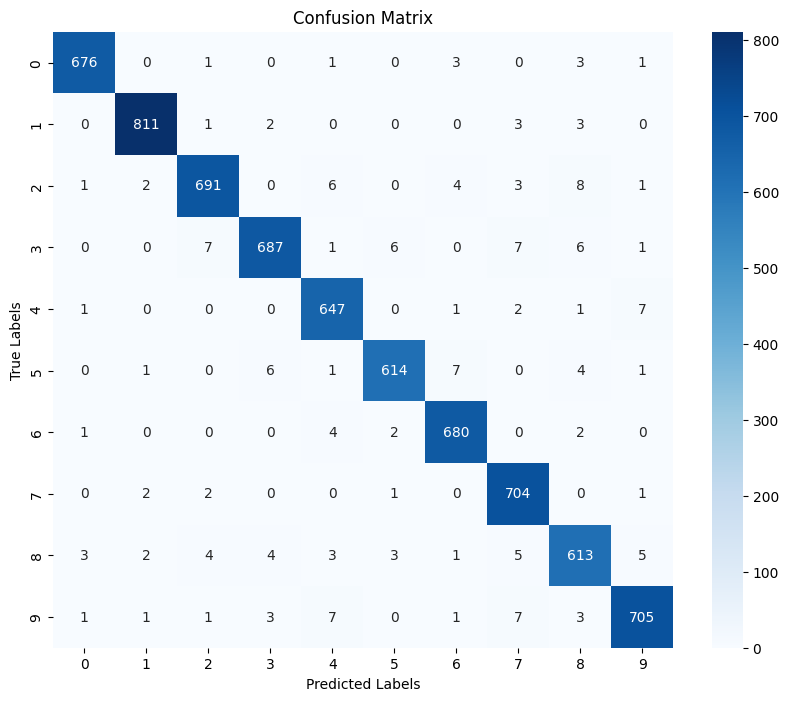

In [ ]:
import seaborn as sns
# Modelin Gerçek Dünyadaki durumu
#hiç görmediği durumlardaki tepkisi
#validation a yakın olması beklenir
test_loss, test_acc = model.evaluate(x_test,y_test)
print('Test accuracy:', test_acc)

y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

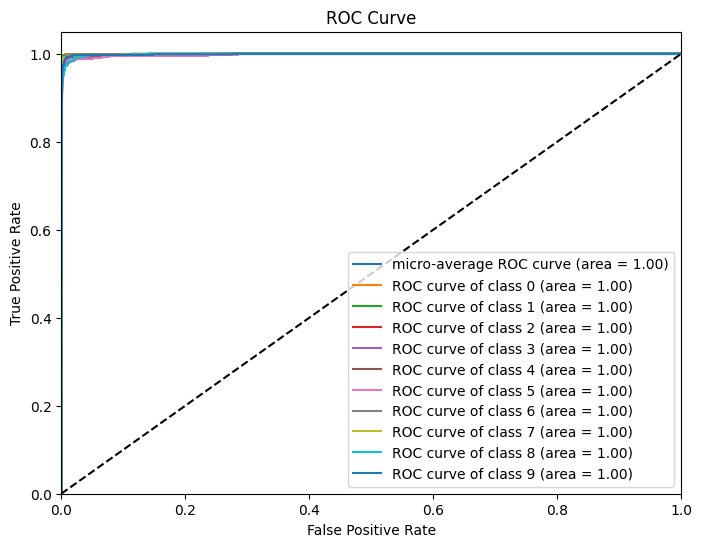

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 10  # Sınıf sayısı

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Micro-average ROC ve AUC hesapla
# y_test ve y_pred_probs'ı ikili matrislere dönüştür
y_test_bin = np.eye(n_classes)[y_test]
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# ROC eğrisini çiz
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
#bütün sınıflar birbirinden çok iyi ayrışabilmiş

In [ ]:
model.save("mnist_model.keras")
#mmodeli kaydettik

Saving Adsız.jpg to Adsız (7).jpg


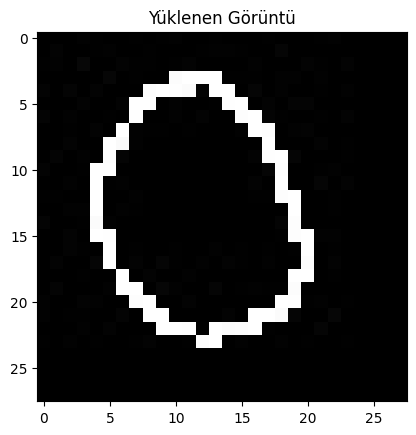

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Tahmin Edilen Etiket: 3


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import io
from google.colab import files

# Modeli yükle
yuklenen_model = keras.models.load_model('mnist_model.keras')

# Kullanıcıdan görüntüyü al
yuklenen = files.upload()
for filename in yuklenen.keys():
    # Yüklenen dosyayı PIL Image nesnesine dönüştür
    img = Image.open(io.BytesIO(yuklenen[filename])).convert('L')

    # Görüntüyü 28x28 boyutuna yeniden boyutlandır
    img = img.resize((28, 28))

    # Görüntüyü 784 boyutlu bir NumPy dizisine dönüştür ve normalize et
    goruntu = np.array(img).reshape(1, 784).astype('float32') / 255.0

    # Görüntüyü görselleştir
    plt.imshow(img, cmap='gray')
    plt.title('Yüklenen Görüntü')
    plt.show()

    # Tahmin yap
    tahmin_probs = yuklenen_model.predict(goruntu)
    tahmin = np.argmax(tahmin_probs, axis=1)
    print(f'Tahmin Edilen Etiket: {tahmin[0]}')